In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

In [3]:
print(red.shape)
print(white.shape)

(1599, 12)
(4898, 12)


In [4]:
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75

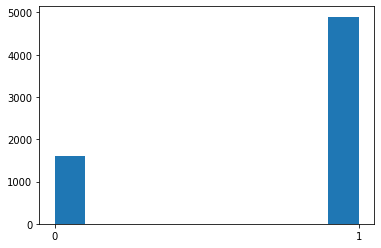

1    4898
0    1599
Name: type, dtype: int64


In [5]:
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

In [6]:
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [7]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [8]:
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
3549       0.181818          0.166667     0.120482  ...  0.434783  0.500000   1.0
554        0.330579          0.133333     0.204819  ...  0.594203  0.666667   1.0
975        0.280992          0.220000     0.180723  ...  0.202899  0.333333   0.0
1812       0.148760          0.253333     0.144578  ...  0.666667  0.500000   1.0
2428       0.289256          0.093333     0.156627  ...  0.463768  0.500000   1.0

[5 rows x 13 columns]
[[0.18181818 0.16666667 0.12048193 0.01840491 0.03654485 0.16666667
  0.35253456 0.09234625 0.53488372 0.1741573  0.43478261 0.5
  1.        ]
 [0.33057851 0.13333333 0.20481928 0.01533742 0.03156146 0.10763889
  0.25806452 0.05764411 0.21705426 0.08988764 0.5942029  0.66666667
  1.        ]
 [0.28099174 0.22       0.18072289 0.02300613 0.12292359 0.11805556
  0.15207373 0.19066898 0.55813953 0.16853933 0.20289855 0.33333333
  0.        ]
 [0.14876033 0.25333333 0.14457831 0.06441

In [9]:
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

[0.18181818 0.16666667 0.12048193 0.01840491 0.03654485 0.16666667
 0.35253456 0.09234625 0.53488372 0.1741573  0.43478261 0.5       ]
1.0
[0.18181818 0.08       0.14457831 0.07208589 0.10963455 0.16666667
 0.44930876 0.1455562  0.37984496 0.11797753 0.2173913  0.33333333]
1.0
[0. 1.]
[0. 1.]


In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


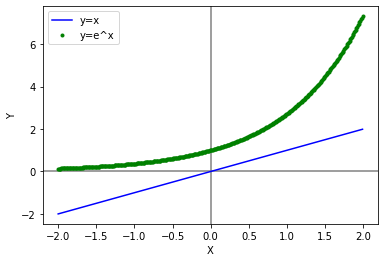

In [11]:
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [12]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 3ms/step - loss: 0.1497 - accuracy: 0.9435 - val_loss: 0.0352 - val_accuracy: 0.9923
Epoch 2/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9787 - val_loss: 0.1315 - val_accuracy: 0.9592
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0317 - val_accuracy: 0.9923
Epoch 4/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.9877 - val_loss: 0.0688 - val_accuracy: 0.9846
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9874 - val_loss: 0.0472 - val_accuracy: 0.9892
Epoch 6/25
122/122 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9885 - val_loss: 0.0286 - val_accuracy: 0.9938
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9820 - val_loss: 0.0572 - val_accuracy: 0.9885
Epoch 

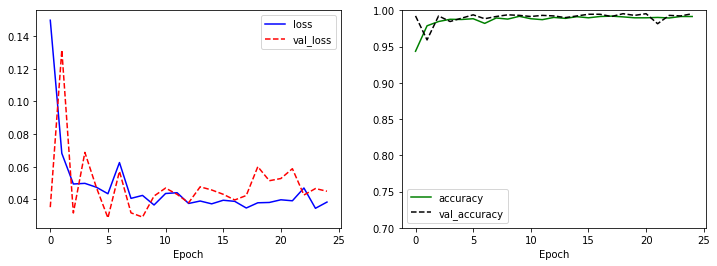

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [14]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 818us/step - loss: 0.0394 - accuracy: 0.9923


[0.039360079914331436, 0.9923076629638672]

In [15]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


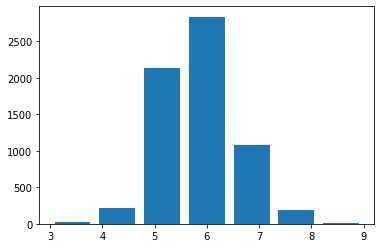

In [16]:
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [17]:
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [18]:
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7960 - val_loss: 0.4235 - val_accuracy: 0.7915
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8022 - val_loss: 0.4643 - val_accuracy: 0.7915
Epoch 3/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8024 - val_loss: 0.4272 - val_accuracy: 0.7915
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8004 - val_loss: 0.4414 - val_accuracy: 0.7915
Epoch 5/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8016 - val_loss: 0.4161 - val_accuracy: 0.7915
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7970 - val_loss: 0.4545 - val_accuracy: 0.7915
Epoch 7/25
122/122 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8065 - val_loss: 0.4473 - val_accuracy: 0.7923
Epoch 

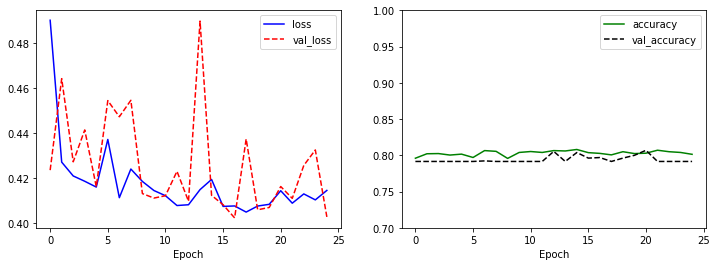

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [21]:
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8108


[0.3826436996459961, 0.810769259929657]

In [22]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


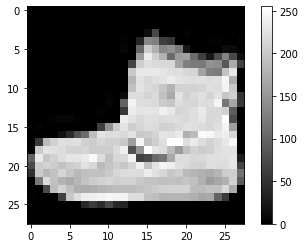

9


In [23]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [24]:
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5249 - accuracy: 0.8169 - val_loss: 0.4365 - val_accuracy: 0.8447
Epoch 2/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3909 - accuracy: 0.8591 - val_loss: 0.3728 - val_accuracy: 0.8646
Epoch 3/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3486 - accuracy: 0.8740 - val_loss: 0.3550 - val_accuracy: 0.8737
Epoch 4/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3219 - accuracy: 0.8822 - val_loss: 0.3456 - val_accuracy: 0.8745
Epoch 5/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3016 - accuracy: 0.8895 - val_loss: 0.3283 - val_accuracy: 0.8825
Epoch 6/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2878 - accuracy: 0.8936 - val_loss: 0.3332 - val_accuracy: 0.8807
Epoch 7/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2723 - accuracy: 0.8992 - val_loss: 0.3540 - val_accuracy:

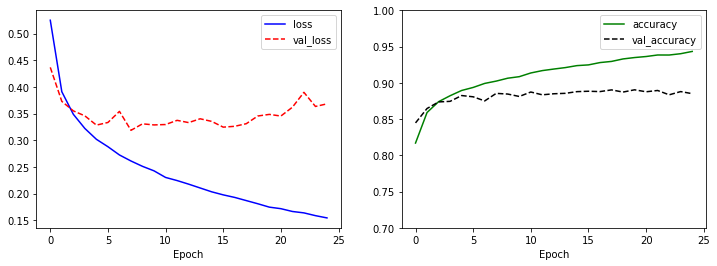

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [28]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8776


[0.411212682723999, 0.8776000142097473]